# Machine Learning Project for Marketing Campaign
## Kelompok 7 : Emergency Code 7

#### Exploratory Data Analysis Team (Data Analyst):

Vito Muhammad

Dean Dwi Mahendra

Widia Nurlina Rahayu

#### Feature Engineering Team (Data Engineer):

Daris Rayhan Handoko

Nurhidayah Tasmin

#### Machine Learning Team:

Muh. Rizki Alim

Sri Devi

* Data yang digunakan di sini adalah data marketing campaign dengan keterangan kolom-kolom data sebagai berikut:

**AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
**AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
**AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
**AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
**AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
**Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
**Complain** - 1 if customer complained in the last 2 years<br>
**DtCustomer** - date of customer’s enrolment with the company<br>
**Education** - customer’s level of education<br>
**Marital** - customer’s marital status<br>
**Kidhome** - number of small children in customer’s household<br>
**Teenhome** - number of teenagers in customer’s household<br>
**Income** - customer’s yearly household income<br>
**MntFishProducts** - amount spent on fish products in the last 2 years<br>
**MntMeatProducts** - amount spent on meat products in the last 2 years<br>
**MntFruits** - amount spent on fruits products in the last 2 years<br>
**MntSweetProducts** - amount spent on sweet products in the last 2 years<br>
**MntWines** - amount spent on wine products in the last 2 years<br>
**MntGoldProds** - amount spent on gold products in the last 2 years<br>
**NumDealsPurchases** - number of purchases made with discount<br>
**NumCatalogPurchases** - number of purchases made using catalogue<br>
**NumStorePurchases** - number of purchases made directly in stores<br>
**umWebPurchases** - number of purchases made through company’s web site<br>
**NumWebVisitsMonth** - number of visits to company’s web site in the last month<br>
**Recency** - number of days since the last purchase<br>

## EXPLORATORY DATA ANALYSIS (EDA) (STAGE 1)

In [1367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [1368]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

In [1369]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [1370]:
### Menambah kolom tanggal acuan data dikumpulkan
df['Observed_Time'] = '2015-02-02'
df['Observed_Time'] = pd.to_datetime(df['Observed_Time'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [1371]:
### Membuat kolom umur dari data Year_Birth agar lebih mudah dipahami
df['Umur'] = 2015 - df['Year_Birth']

In [1372]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34


In [1373]:
## Mengkelompokkan kategori customer kedalam segmentasi berdasarkan kelahiran

kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i]<1945:
        kel.append('Pre-boomer')
    elif df['Year_Birth'][i]<=1946 or df['Year_Birth'][i]<=1964 :
        kel.append('Baby boomers')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980 :
        kel.append('Generasi X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996 :
        kel.append('Generasi Y')
    else:
        kel.append('Generasi Z')
        
df['Kelompok_Usia'] = kel
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y


In [1374]:
#Check Duplicate
print(df.shape)

print('Jumlah kolom yang terduplikasi :', df.duplicated().sum())

(2240, 32)
Jumlah kolom yang terduplikasi : 0


In [1375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

* #### 1. Berdasarkan summary info diatas maka kita mempunyai 3 kelompok kategorikal
* #### 2. Hanya kolom Income yang memiliki nilai missing value
* #### 3. Tidak ada data yang terduplikasi

In [1376]:
#missing Value
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Observed_Time           0
Umur                    0
Kelompok_Usia           0
dtype: int64


In [1377]:
a = (24/2240)*100
print ("jumlah mising value pada kolom income yaitu sebesar", a, "%")

jumlah mising value pada kolom income yaitu sebesar 1.0714285714285714 %


In [1378]:
### Kolom ID dapat diabaikan

numericals = ['Year_Birth','Income','Kidhome','Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','Complain','Z_CostContact','Z_Revenue','Response','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','Umur']
categoricals = ['Education','Marital_Status','kelompok_usia']
other = ['Complain', 'Z_CostContact', 'Z_Revenue']

belanja = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
jenispembelian= ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
accepted_campaign = ['AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4']
target_variable = ['Response']

In [1379]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [1380]:
#sns.pairplot(data=df, x_vars=['Income', 'Umur', 'Recency'], y_vars=['Income', 'Umur', 'Recency'],  hue='Response')

In [1381]:
## BIKIN BOXPLOT SEBARAN DATA

In [1382]:
### daftar fungsi visualisasi

def visual_histplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.histplot(df[col],kde=True)
    plt.title('Distribusi data ' + col)
    plt.show()
    
def visual_boxplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.boxplot(df[col])
    plt.title('Distribusi data '+ col +' dalam bentuk Boxplot')
    plt.show()
    
def visual_countplot(col, hue=None):
    plt.figure(figsize=(6,4), dpi=100)
    sns.countplot(data=df, x=col, hue=hue)
    plt.title('Distribusi data ' + col)
    plt.show()

## Visualize the Data for Univariate Analysis

### INCOME

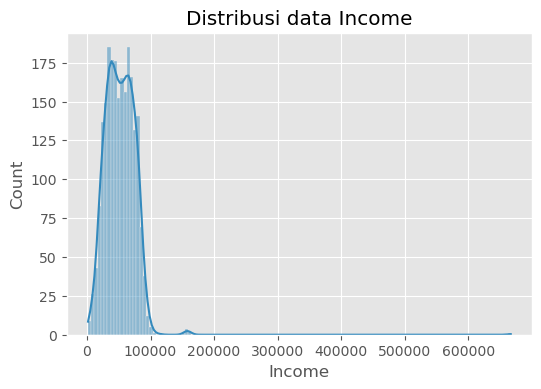

In [1383]:
visual_histplot('Income')

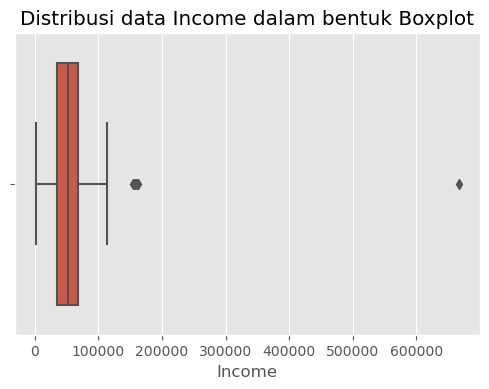

In [1384]:
visual_boxplot('Income')

In [1385]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### UMUR

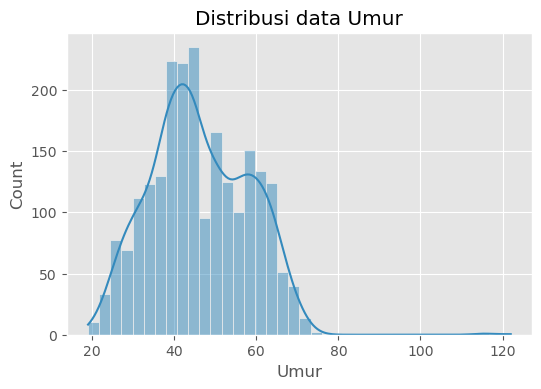

In [1386]:
visual_histplot('Umur')

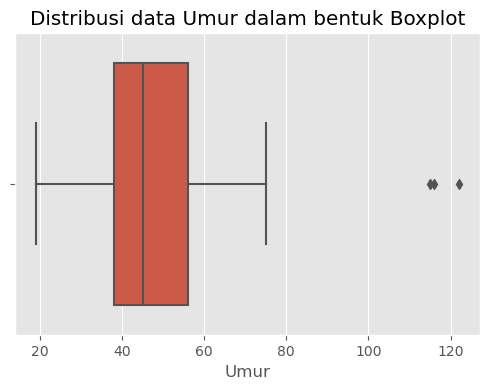

In [1387]:
visual_boxplot('Umur')

In [1388]:
df['Umur'].describe()

count    2240.000000
mean       46.194196
std        11.984069
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Umur, dtype: float64

### Education

In [1389]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

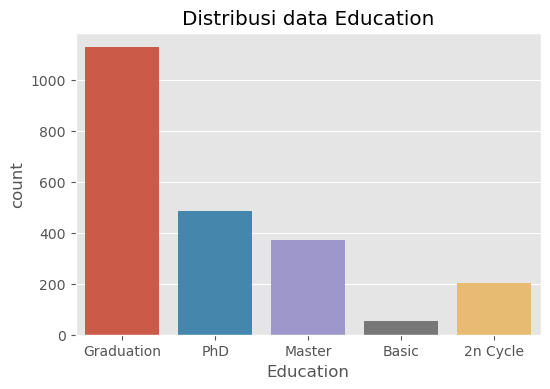

In [1390]:
visual_countplot('Education')

## Marital Status

In [1391]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

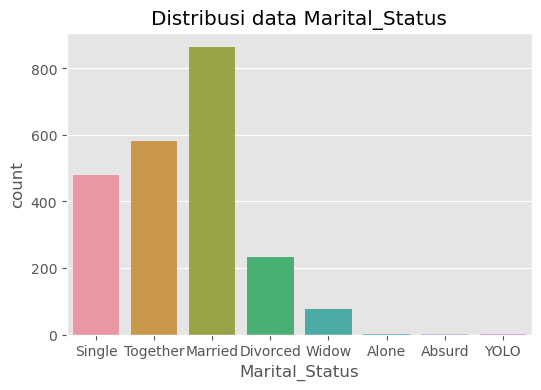

In [1392]:
visual_countplot('Marital_Status')

## Recency

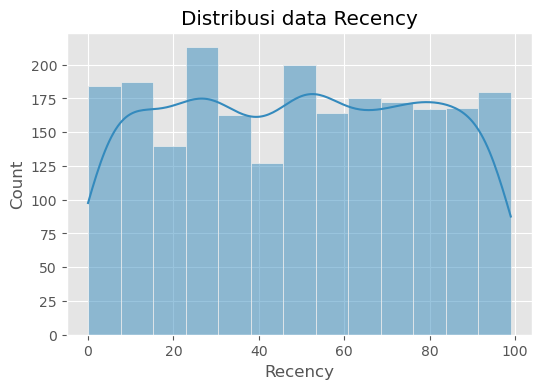

In [1393]:
visual_histplot('Recency')

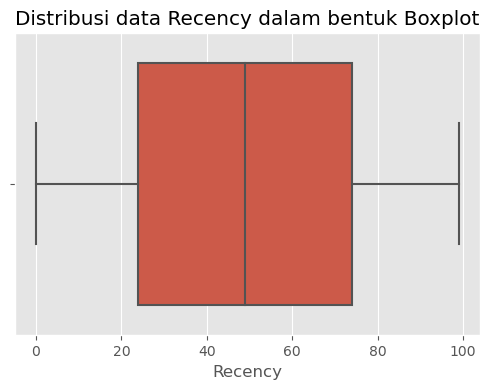

In [1394]:
visual_boxplot('Recency')

In [1395]:
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

## Visualize the Data for Multivariate Analysis

* ### Visualisasi Target Variabel ( Kolom Response)

<AxesSubplot:xlabel='Response', ylabel='count'>

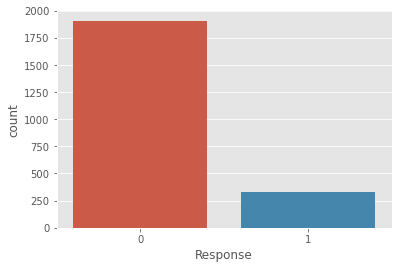

In [1396]:
## Visualisasi target variable (y) yaitu pada kolom response

sns.countplot(data=df, x=df['Response'])

In [1397]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [1398]:
print('Tingkat keberhasilan (Response Rate) campaign terakhir adalah sebesar : '+ str(np.mean(df.Response==1) * 100) + ' %')

Tingkat keberhasilan (Response Rate) campaign terakhir adalah sebesar : 14.910714285714285 %


* ### Hubungan Recency dengan Response

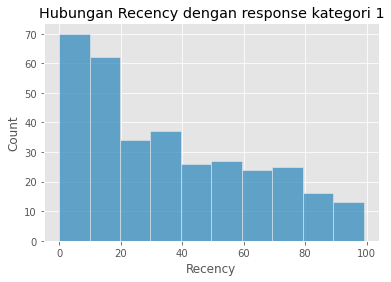

In [1399]:
sns.histplot(x=df.Recency[df.Response==1])
plt.title('Hubungan Recency dengan response kategori 1');

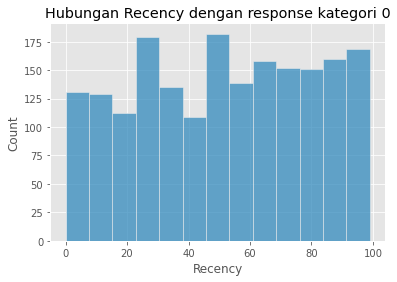

In [1400]:
sns.histplot(x=df.Recency[df.Response==0])
plt.title('Hubungan Recency dengan response kategori 0');

* Berdasarkan tabel diatas seseorang yang memiliki recency lebih rendah lebih cenderung untuk menerima Response campaign marketing (**Hal ini dilihat dari sebaran recency pada kategori 1 didominasi customer dengan recency yang rendah**). Sedangkan sebaran recency pada kategori Response 0 tidak dapat diketahui hubungannya

* ### Hubungan atau History Campaign Sebelumnya dengan Campaign Terakhir (Response)

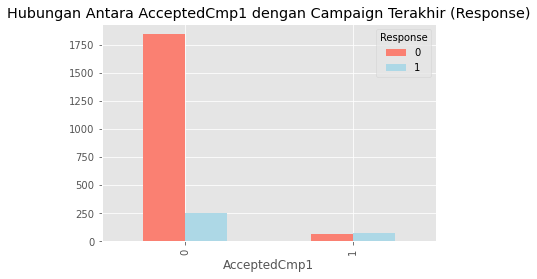

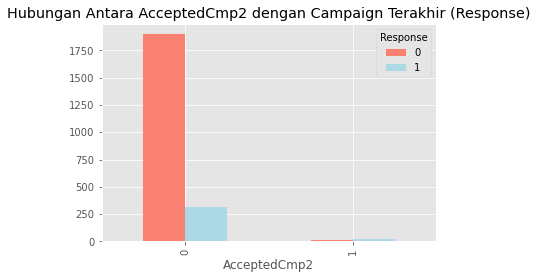

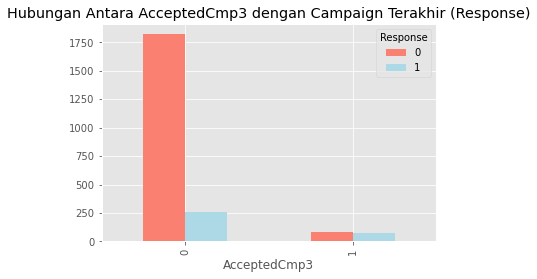

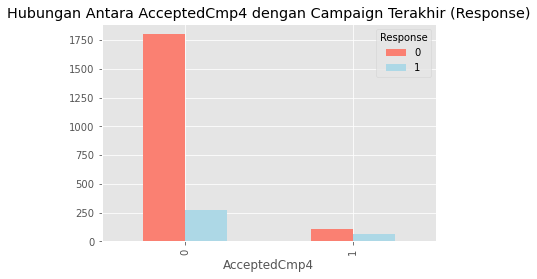

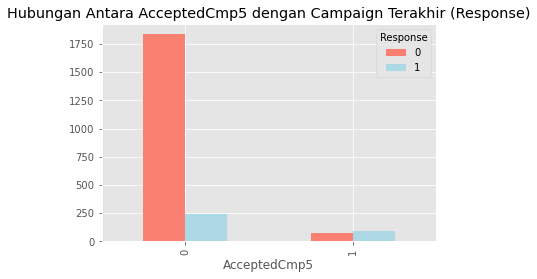

In [1401]:
kolom = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

for col in kolom :
    pd.crosstab(df[col], df.Response).plot( kind ='bar', 
                                                    figsize=(6,4),
                                                    color = ['salmon','lightblue'])
    plt.title('Hubungan Antara '+ col + ' dengan Campaign Terakhir (Response)')

* Jika dilihat dari hubungan grafik diatas maka history campaign pertama hingga kelima terhadap response terhitung baik dimana awalnya ketika customer pada campaign sebelumnya tidak meresponse( response kategori 0), kemudian berubah pada campaign terakhir meresponse ( kategori response menjadi 1). Sedangkan jumlah campaign pertama hingga kelima yang awalnya meresponse campaign atau terkategori 1 yang kemudian tidak meresponse campaign terakhir atau menjadi kategori 0 pada response, jumlahnya lebih sedikit.

* ### Hubungan total campaign dengan spending dan purchase

In [1402]:
df['Total_Campaign'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

* ### Hubungan antara Income and Spending tiap Produk pada Kasus Response kategori 1

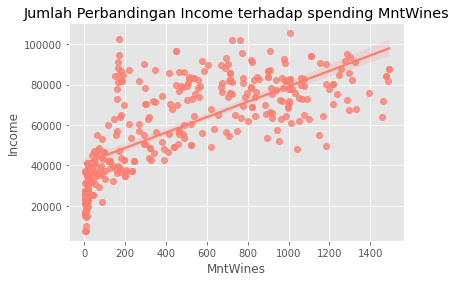

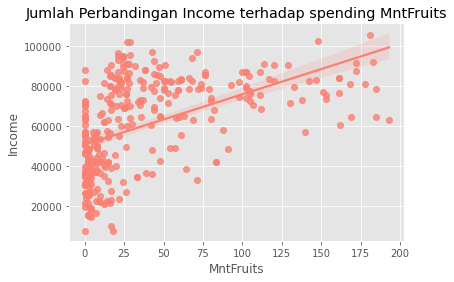

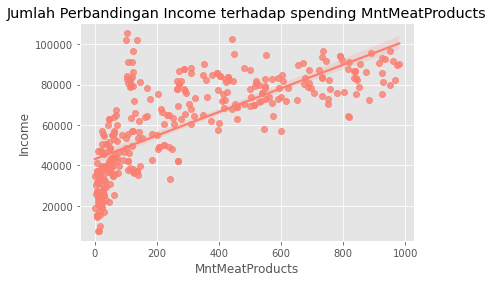

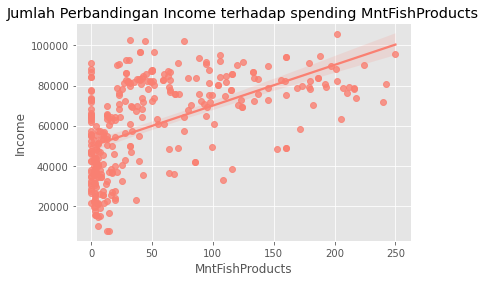

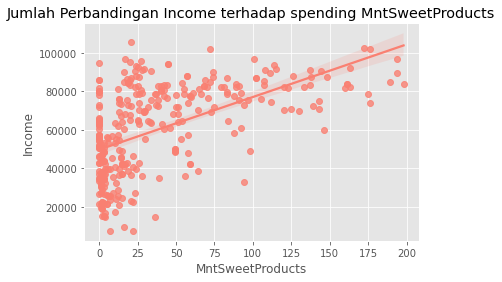

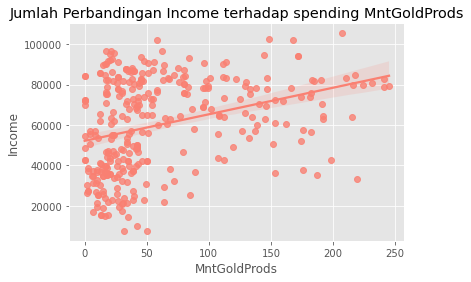

In [1403]:
# Relation about Income and Spending amount pada Kasus Response kategori 1

for col in belanja:
    plt.figure(figsize=(6,4))
    sns.regplot(df[col][df.Response == 1],
           df.Income[df.Response == 1],
           color='salmon')
    plt.title('Jumlah Perbandingan Income terhadap spending ' + col)
    plt.xlabel(col)
    plt.ylabel('Income')

* berdasarkan grafik diatas dapat disimpulkan, ketika income semakin tinggi, kemungkinan spending amount pada suatu produk akan semakin besar

* ### Hubungan antara Income and jumlah jenis pembelian (NumPurchase) pada Kasus Response kategori 1

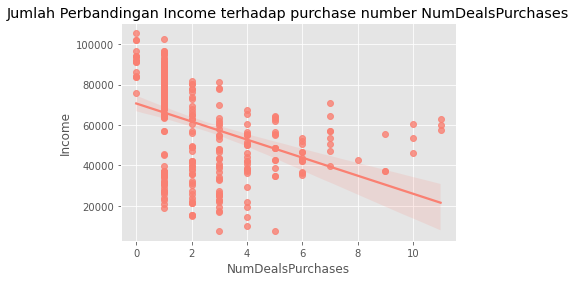

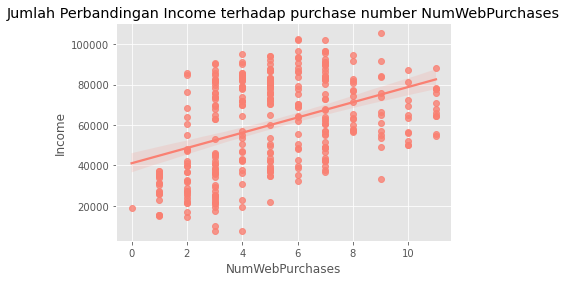

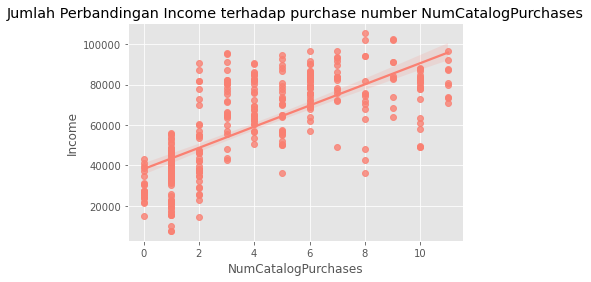

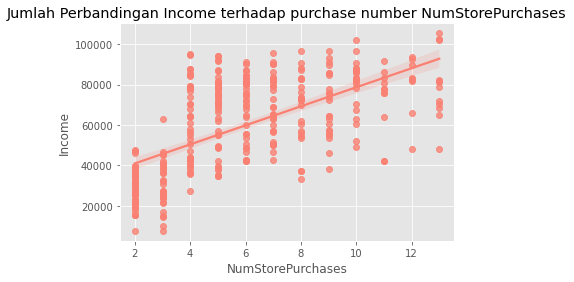

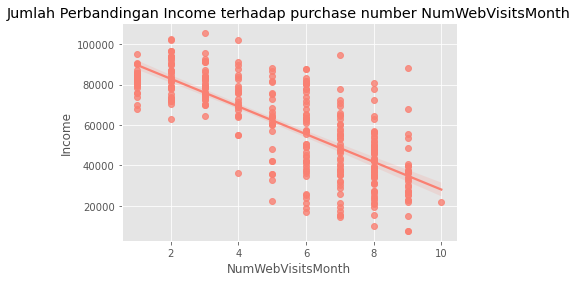

In [1404]:
# Relation about Income and Spending amount pada Kasus Response kategori 1

for col in jenispembelian:
    plt.figure(figsize=(6,4))
    sns.regplot(df[col][df.Response == 1],
           df.Income[df.Response == 1],
           color='salmon')
    plt.title('Jumlah Perbandingan Income terhadap purchase number ' + col)
    plt.xlabel(col)
    plt.ylabel('Income')

* Berdasarkan tabel diatas, ketika seseorang memiliki income yang tinggi, semaking tinggi pula kemungkinan jumlah transaksi yang dilakukan. 
* Hal ini berbanding terbalik pada kategori transaksi bertipe diskon, dimana seseorang cenderung memanfaatkan diskon ketika income yang dimiliki cenderung rendah
* Seseorang dengan income yang cenderung rendah lebih sering mengujungi web yang diduga untuk melakukan pencarian produk secara cepat dan kemungkinan adanya tawaran diskon

In [1405]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0


In [1406]:
## Sebaran data Education

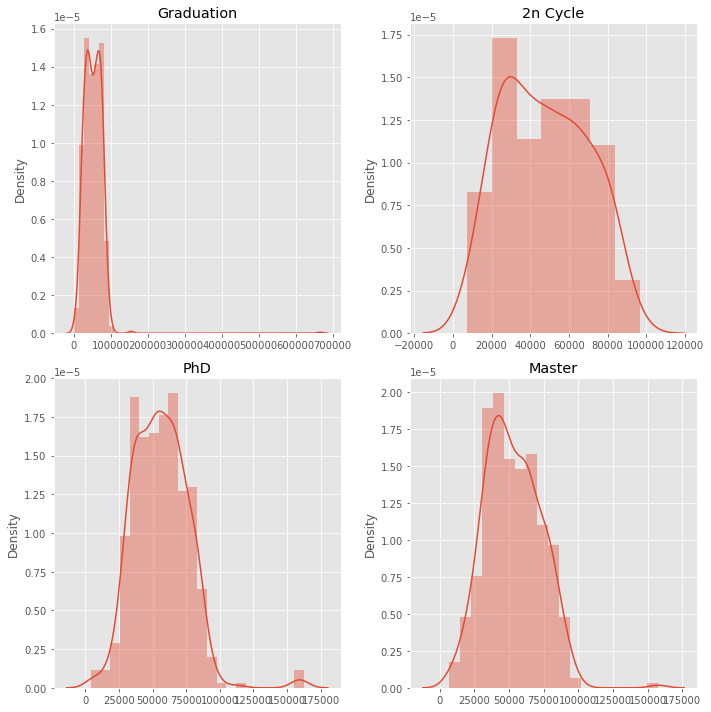

In [1407]:
# Distplot
f, axes = plt.subplots(2, 2,figsize=(10,10))
ax1 = sns.distplot(df[df['Education']=='Graduation'][['Income']],ax=axes[0][0])
ax2 = sns.distplot(df[df['Education']=='2n Cycle'][['Income']],ax=axes[0][1])
ax3 = sns.distplot(df[df['Education']=='PhD'][['Income']],ax=axes[1][0])
ax4 = sns.distplot(df[df['Education']=='Master'][['Income']],ax=axes[1][1])
ax1.title.set_text('Graduation')
ax2.title.set_text('2n Cycle')
ax3.title.set_text('PhD')
ax4.title.set_text('Master')
plt.tight_layout()
plt.show()

In [1408]:
df['Total_Purchase'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['Total_Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

In [1409]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422


* ### Hubungan mengenai lamanya customer bergabung (join) pada Kasus Response kategori 1

In [1410]:
df['Join_Period'] = df['Observed_Time'].dt.to_period('M').astype(int) - df['Dt_Customer'].dt.to_period('M').astype(int)

## Lamanya bergabung dalam satuan nilai bulan ( berapa bulan telah bergabung )

In [1411]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617,29
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776,18
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53,12
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422,13


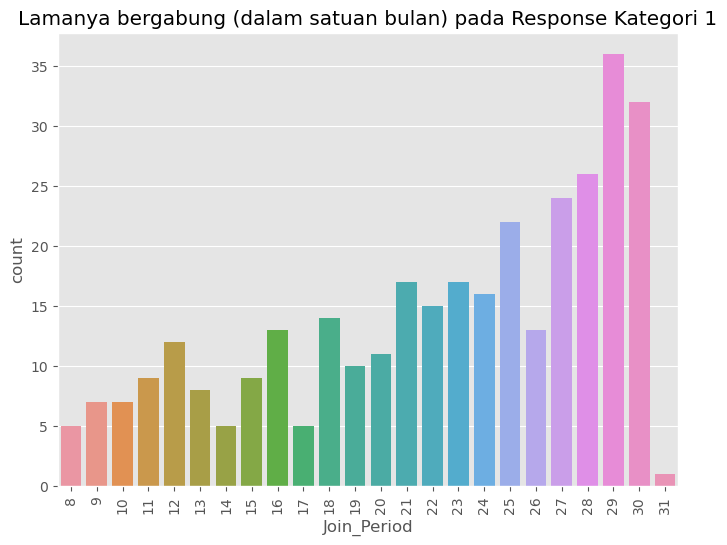

In [1412]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(x=df.Join_Period[df.Response==1])
plt.xticks(rotation=90)
plt.title('Lamanya bergabung (dalam satuan bulan) pada Response Kategori 1')
plt.show()

In [1413]:
## Menggabungkan kolom kids dan teenhome menjadi Jumlah_anak

df['Jumlah_Anak'] = df['Kidhome'] + df['Teenhome']

## DATA PREPROCESSING ( STAGE 2 )

* ### Feature Extraction

Pada langkah sebelumnya telah dilakukan beberapa feature extraction terlebih dahulu guna mendapat insight lebih jelas mengenai visualisasi data baik dalam bentuk univariate maupun multivariate analysis.

Kolom baru tersebut meliput :
* Umur
* Kelompok_usia
* Total_purchase
* Total_spending
* JoinPeriod
* Observed_Time

In [1414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

* ### Handling Missing Values

In [1415]:
df['Income'].isnull().sum()

24

In [1416]:
df.groupby('Education').median()[['Income']]

,Income
Education,
2n Cycle,46805.0
Basic,20744.0
Graduation,52028.5
Master,50943.0
PhD,55212.0


In [1417]:
print('Kolom pada income yang memiliki nilai missing',df[df['Income'].isna()]['Education'].unique())

Kolom pada income yang memiliki nilai missing ['Graduation' 'PhD' '2n Cycle' 'Master']


In [1418]:
## Impute nilai missing value pada income sesuai dengan tingkat edukasi customer dengan pendekatan nilai median

In [1419]:
def fillna(col):
    if pd.isna(col['Income']):
        if col['Education'] == '2n Cycle':
            return 46805.0
        elif col['Education'] == 'Graduation':
            return 52028.5
        elif col['Education'] == 'PhD':
            return 55212.0
        elif col['Education'] == 'Master':
            return 50943.0
    else:
        return col['Income']

In [1420]:
df['Income'] = df[['Education', 'Income']].apply(fillna, axis=1)

In [1421]:
df['Income'].isna().sum()

0

* ### Handling Outliers

* #### Outliers pada kolom umur

In [1422]:
pd.DataFrame(df['Umur'].sort_values(ascending=False))

,Umur
239,122
339,116
192,115
1950,75
424,74
...,...
696,20
747,20
995,20
1170,19


In [1423]:
### membuang kolom umur diatas 100 tahun
### memfilter hanya umur dibawah 100 tahun

df = df[df.Umur < 100]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617,29,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27,11,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776,18,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53,12,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2015-02-02,48,Generasi X,0,18,1341,20,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2015-02-02,69,Baby boomers,1,22,444,8,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,1,19,1241,13,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2015-02-02,59,Baby boomers,0,23,843,13,1


* #### Outliers pada Income

In [1424]:
from scipy import stats

In [1425]:
# Handling Outlier Berdsarkan Z-Score
# Outlier umur dibuang karena dianggap tidak memiliki dampak yang signifikan jika outliernya dibuang

z_scores = np.abs(stats.zscore(df['Income']))
filtered_entries = (z_scores < 3)
df = df[filtered_entries]

df
# Terdapat 8 outlier yang dibuang berdasarkan kolom Income

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2015-02-02,58,Baby boomers,0,25,1617,29,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2015-02-02,61,Baby boomers,0,6,27,11,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2015-02-02,50,Generasi X,0,21,776,18,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2015-02-02,31,Generasi Y,0,8,53,12,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2015-02-02,48,Generasi X,0,18,1341,20,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2015-02-02,69,Baby boomers,1,22,444,8,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2015-02-02,34,Generasi Y,1,19,1241,13,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2015-02-02,59,Baby boomers,0,23,843,13,1


* ### Membuang kolom yang tidak relevan

In [1426]:
col_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Observed_Time', 'Complain', 'Z_CostContact', 'Z_Revenue']

df = df.drop(col_drop, axis=1)

In [1427]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,Baby boomers,0,25,1617,29,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,Baby boomers,0,6,27,11,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,Generasi X,0,21,776,18,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,Generasi Y,0,8,53,12,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,48,Generasi X,0,18,1341,20,1
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,69,Baby boomers,1,22,444,8,3
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,34,Generasi Y,1,19,1241,13,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,59,Baby boomers,0,23,843,13,1


* ### Handling imbalanced data

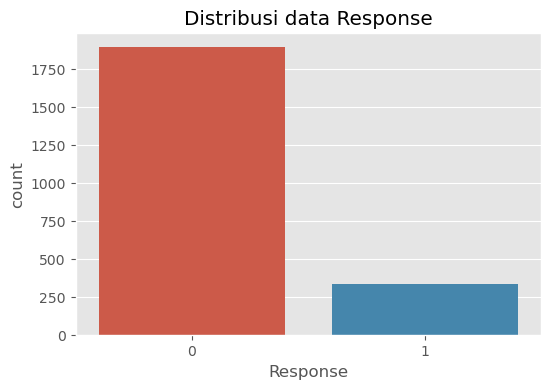

In [1428]:
visual_countplot('Response')

**Terlihat bahwasanya data response atau target variabel tidak balanced secara merata, sehingga pada proses modelling nanti akan dilakukan proses oversampling pada data train dalam hal menangani imbalanced class**

* ### CORRELATION BETWEEN FEATURES

<AxesSubplot:>

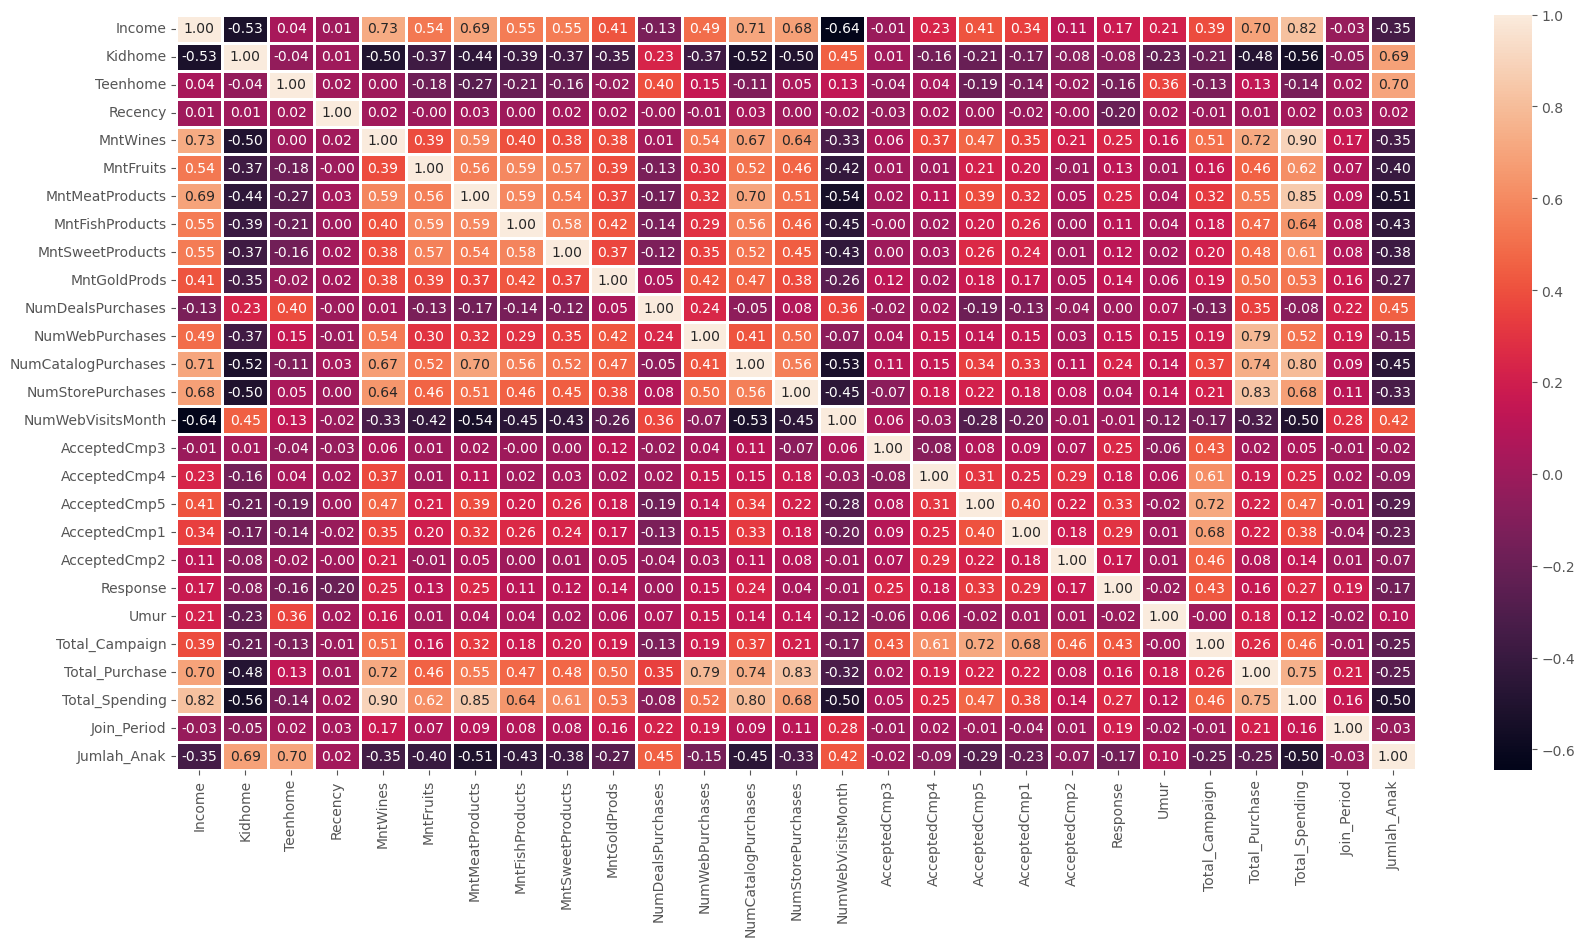

In [1429]:
correlation_df = df.corr()

plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(correlation_df, annot=True, linewidths=1, fmt='.2f')

* Dari grafik heatmap diatas masih ditemukan feature redundan atau korelasi antar feature yang memiliki nilai tinggi. Pada proses modelling nantinya akan dilakukan proses filtering feature lagi agar tidak terjadi overfitting pada hasil model yang diharapkan

In [1430]:
corr = df.corr()['Response'].sort_values(ascending=False)
corr

Response               1.000000
Total_Campaign         0.425875
AcceptedCmp5           0.327911
AcceptedCmp1           0.293617
Total_Spending         0.266786
AcceptedCmp3           0.253838
MntMeatProducts        0.247103
MntWines               0.246534
NumCatalogPurchases    0.235325
Join_Period            0.194444
AcceptedCmp4           0.176544
Income                 0.174423
AcceptedCmp2           0.169131
Total_Purchase         0.156328
NumWebPurchases        0.147032
MntGoldProds           0.139726
MntFruits              0.125192
MntSweetProducts       0.116545
MntFishProducts        0.110609
NumStorePurchases      0.036697
NumDealsPurchases      0.003424
NumWebVisitsMonth     -0.007097
Umur                  -0.018918
Kidhome               -0.080514
Teenhome              -0.155726
Jumlah_Anak           -0.170480
Recency               -0.199078
Name: Response, dtype: float64

* Tingkat korelasi feature numeric dengan target tidak ada yang melebihi nilai 0.5 dan dapat dilihat secara berurutan feature mana yang memiliki nilai korelasi paling tinggi hingga terendah

# MODELLING & EVALUATION ( STAGE 3)

### Pemilihan Dataset untuk proses Modelling sebagai alternative

Dataset yaitu df ini nantinya akan terbagi ke dalam berbagai skenario untuk mendapatkan nilai terbaik pada proses modelling

# DATASET 1

In [1431]:
df_1 = df.copy()

In [1432]:
drop_col = ['Kidhome', 'Teenhome', 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds','NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases', 'Kelompok_Usia', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

df_1 = df_1.drop(drop_col, axis=1)
df_1.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Response,Umur,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,58,7,1,58,0,25,1617,29,0
1,Graduation,Single,46344.0,38,5,0,61,0,6,27,11,2
2,Graduation,Together,71613.0,26,4,0,50,0,21,776,18,0
3,Graduation,Together,26646.0,26,6,0,31,0,8,53,12,1
4,PhD,Married,58293.0,94,5,0,34,0,19,422,13,1


In [1433]:
df_1 = pd.get_dummies(df_1)
df_1

,Income,Recency,NumWebVisitsMonth,Response,Umur,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,7,1,58,0,25,1617,29,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,38,5,0,61,0,6,27,11,2,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,26,4,0,50,0,21,776,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,26,6,0,31,0,8,53,12,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,94,5,0,34,0,19,422,13,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,5,0,48,0,18,1341,20,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,64014.0,56,7,0,69,1,22,444,8,3,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,56981.0,91,6,0,34,1,19,1241,13,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,69245.0,8,3,0,59,0,23,843,13,1,0,0,0,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

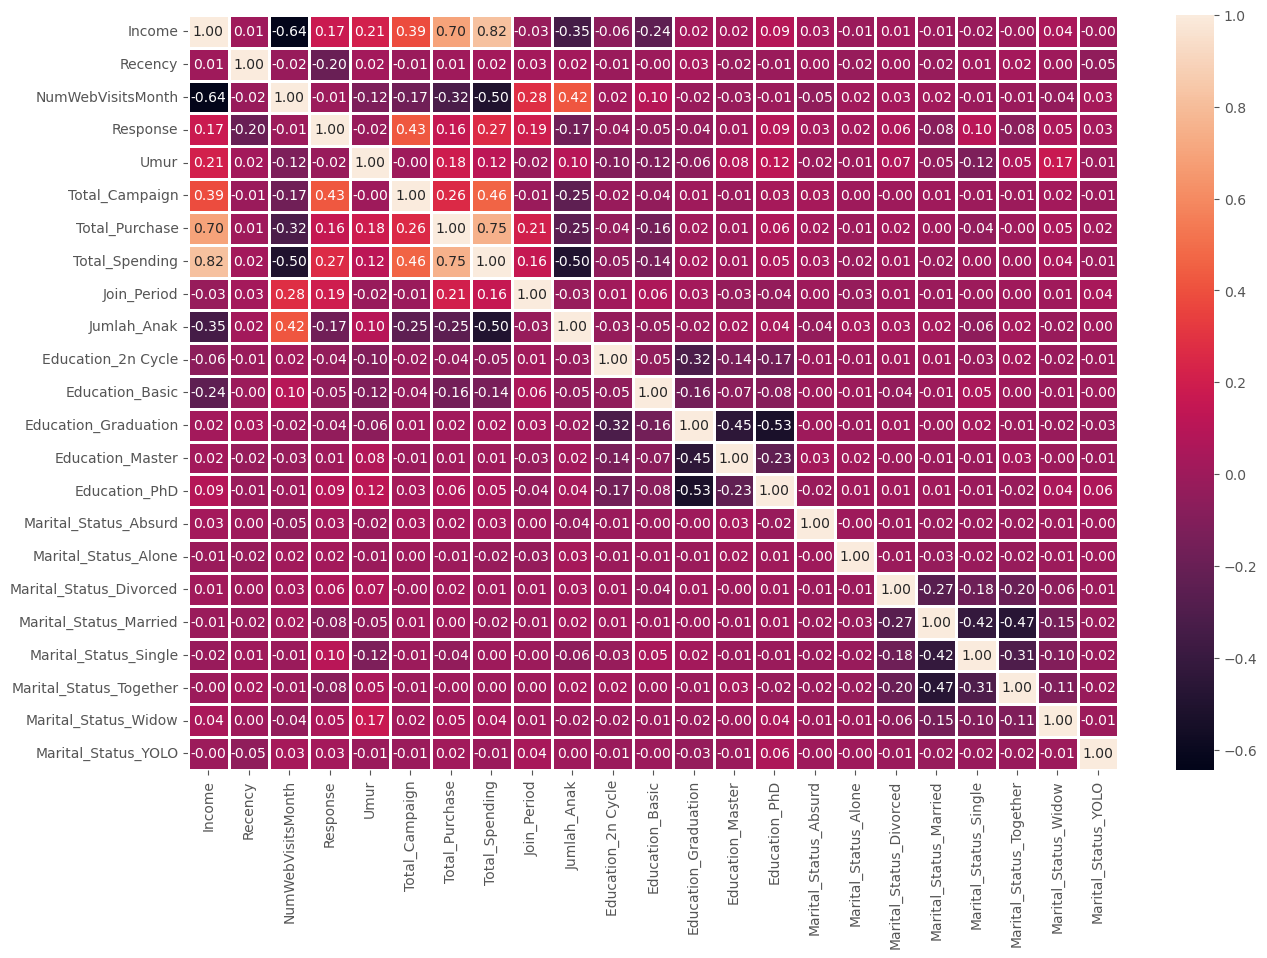

In [1434]:
correlation = df_1.corr()

plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(correlation, annot=True,  linewidth=2, fmt='.2f')

In [1435]:
X = df_1.drop('Response', axis=1)
y = df_1['Response']

## Proses Modelling

In [1436]:
from sklearn.model_selection import train_test_split

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler

from imblearn import over_sampling, under_sampling
#X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

In [1437]:
## Splitting data menjadi train and test

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1438]:
## Oversampling pada data train

np.random.seed(42)
X_train, y_train = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [1439]:
## Standarisasi data setelah melakukan splitting to train and test dataset

np.random.seed(42)

scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns)

In [1440]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [1441]:
np.random.seed(42)
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

Learning rate set to 0.015619
0:	learn: 0.6809052	total: 4.22ms	remaining: 4.22s
1:	learn: 0.6720130	total: 8.79ms	remaining: 4.39s
2:	learn: 0.6626038	total: 12.2ms	remaining: 4.04s
3:	learn: 0.6513948	total: 15.6ms	remaining: 3.89s
4:	learn: 0.6428550	total: 19.7ms	remaining: 3.92s
5:	learn: 0.6323442	total: 23.6ms	remaining: 3.91s
6:	learn: 0.6233675	total: 26.9ms	remaining: 3.81s
7:	learn: 0.6156851	total: 30.2ms	remaining: 3.74s
8:	learn: 0.6074735	total: 34.1ms	remaining: 3.75s
9:	learn: 0.6002028	total: 37.5ms	remaining: 3.71s
10:	learn: 0.5916497	total: 40.8ms	remaining: 3.66s
11:	learn: 0.5846831	total: 43.6ms	remaining: 3.59s
12:	learn: 0.5763374	total: 46.6ms	remaining: 3.54s
13:	learn: 0.5695039	total: 50.3ms	remaining: 3.54s
14:	learn: 0.5636947	total: 53.6ms	remaining: 3.52s
15:	learn: 0.5541064	total: 57.1ms	remaining: 3.51s
16:	learn: 0.5471107	total: 60.5ms	remaining: 3.5s
17:	learn: 0.5417010	total: 64.2ms	remaining: 3.5s
18:	learn: 0.5365372	total: 67.9ms	remaining: 

{'KNN': 0.8579970104633782,
 'Logistic Regression': 0.8819133034379671,
 'Random Forest': 0.8729446935724963,
 'Decision Tree': 0.8191330343796711,
 'Adaboost Class': 0.866965620328849,
 'CatBoost Class': 0.8819133034379671,
 'XGB Class': 0.8774289985052317}

* ### Melakukan evaluasi serta penelusuran hasil lebih jauh dari model dengan nilai akurasi tinggi

In [1442]:
np.random.seed(42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8819133034379671

In [1443]:
y_preds = clf.predict(X_test)

In [1444]:
confusion_matrix(y_test, y_preds)

array([[533,  37],
       [ 42,  57]], dtype=int64)

In [1445]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       570
           1       0.61      0.58      0.59        99

    accuracy                           0.88       669
   macro avg       0.77      0.76      0.76       669
weighted avg       0.88      0.88      0.88       669



## ROC Curve

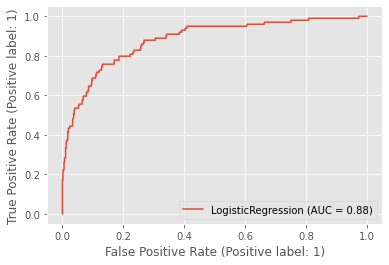

In [1446]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test, y_test);

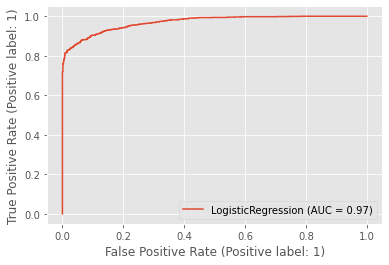

In [1447]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_train, y_train);

In [1448]:
clf.score(X_train, y_train)

0.9056603773584906

In [1449]:
clf.score(X_test, y_test)

0.8819133034379671

## Cross Validation

In [1450]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf,
                         X_train,
                         y_train,
                         cv=15, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
cv_train

array([0.64971751, 0.71186441, 0.7740113 , 0.93220339, 0.96610169,
       0.94350282, 0.97740113, 0.95480226, 0.92655367, 0.94915254,
       0.92613636, 0.94318182, 0.94886364, 0.97159091, 0.90340909])

In [1451]:
cv_mean = np.mean(cv_train)
cv_mean

0.8985661701763397

In [1452]:
# Cross-validated accuracy score on Test Dataset
cv_test = cross_val_score(clf,
                         X_test,
                         y_test,
                         cv=15, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
cv_test

array([0.88888889, 0.84444444, 0.93333333, 0.86666667, 0.91111111,
       0.91111111, 0.88888889, 0.88888889, 0.86666667, 0.97727273,
       0.90909091, 0.95454545, 0.86363636, 0.90909091, 0.88636364])

In [1453]:
cv_mean = np.mean(cv_test)
cv_mean

0.8999999999999999

In [1454]:
from sklearn.model_selection import cross_validate

In [1455]:
validation = cross_validate(clf, X_test, y_test, cv=10, return_train_score=True)

validation

{'fit_time': array([0.02193999, 0.02194166, 0.01994634, 0.01496029, 0.0129652 ,
        0.01396251, 0.02094579, 0.01945829, 0.02292657, 0.01196957]),
 'score_time': array([0.00099754, 0.00299358, 0.00299382, 0.00199437, 0.00199485,
        0.00199437, 0.00499773, 0.00099754, 0.00199461, 0.00099707]),
 'test_score': array([0.88059701, 0.89552239, 0.89552239, 0.92537313, 0.88059701,
        0.89552239, 0.94029851, 0.94029851, 0.85074627, 0.87878788]),
 'train_score': array([0.91528239, 0.91860465, 0.91196013, 0.91196013, 0.91196013,
        0.92026578, 0.910299  , 0.90863787, 0.91528239, 0.91376451])}

In [1456]:
validation = cross_validate(clf, X_test, y_test, cv=10, scoring='precision', return_train_score=True)

validation

{'fit_time': array([0.02194309, 0.01495981, 0.02593327, 0.01595879, 0.01845813,
        0.02393579, 0.01595688, 0.01396179, 0.01695395, 0.02493358]),
 'score_time': array([0.00498462, 0.00299239, 0.00697947, 0.00199461, 0.00199389,
        0.00498676, 0.00299335, 0.00498772, 0.00499487, 0.00199533]),
 'test_score': array([0.66666667, 0.71428571, 0.66666667, 0.85714286, 0.66666667,
        0.71428571, 1.        , 1.        , 0.5       , 0.6       ]),
 'train_score': array([0.81666667, 0.83333333, 0.8       , 0.79032258, 0.81034483,
        0.84745763, 0.78688525, 0.80357143, 0.80645161, 0.81666667])}

# DATASET 2

In [1584]:
df_2 = df.copy()
df_2

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,Baby boomers,0,25,1617,29,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,Baby boomers,0,6,27,11,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,Generasi X,0,21,776,18,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,Generasi Y,0,8,53,12,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,Generasi Y,0,19,422,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,48,Generasi X,0,18,1341,20,1
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,69,Baby boomers,1,22,444,8,3
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,34,Generasi Y,1,19,1241,13,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,59,Baby boomers,0,23,843,13,1


In [1585]:
drop_col = ['Kidhome', 'Teenhome', 'Kelompok_Usia', 'Total_Campaign', 'Total_Purchase', 'Total_Spending', 'NumCatalogPurchases', 'MntWines']

df_2 = df_2.drop(drop_col, axis=1)
df_2.head()

,Education,Marital_Status,Income,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,58,88,546,172,88,88,3,8,4,7,0,0,0,0,0,1,58,29,0
1,Graduation,Single,46344.0,38,1,6,2,1,6,2,1,2,5,0,0,0,0,0,0,61,11,2
2,Graduation,Together,71613.0,26,49,127,111,21,42,1,8,10,4,0,0,0,0,0,0,50,18,0
3,Graduation,Together,26646.0,26,4,20,10,3,5,2,2,4,6,0,0,0,0,0,0,31,12,1
4,PhD,Married,58293.0,94,43,118,46,27,15,5,5,6,5,0,0,0,0,0,0,34,13,1


In [1586]:
df_2 = pd.get_dummies(df_2)
df_2

,Income,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Join_Period,Jumlah_Anak,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,88,546,172,88,88,3,8,4,7,0,0,0,0,0,1,58,29,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,38,1,6,2,1,6,2,1,2,5,0,0,0,0,0,0,61,11,2,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,26,49,127,111,21,42,1,8,10,4,0,0,0,0,0,0,50,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,26,4,20,10,3,5,2,2,4,6,0,0,0,0,0,0,31,12,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,94,43,118,46,27,15,5,5,6,5,0,0,0,0,0,0,34,13,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,43,182,42,118,247,2,9,4,5,0,0,0,0,0,0,48,20,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,64014.0,56,0,30,0,0,8,7,8,5,7,0,0,0,1,0,0,69,8,3,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,56981.0,91,48,217,32,12,24,1,2,13,6,0,1,0,0,0,0,34,13,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,69245.0,8,30,214,80,30,61,2,6,10,3,0,0,0,0,0,0,59,13,1,0,0,0,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

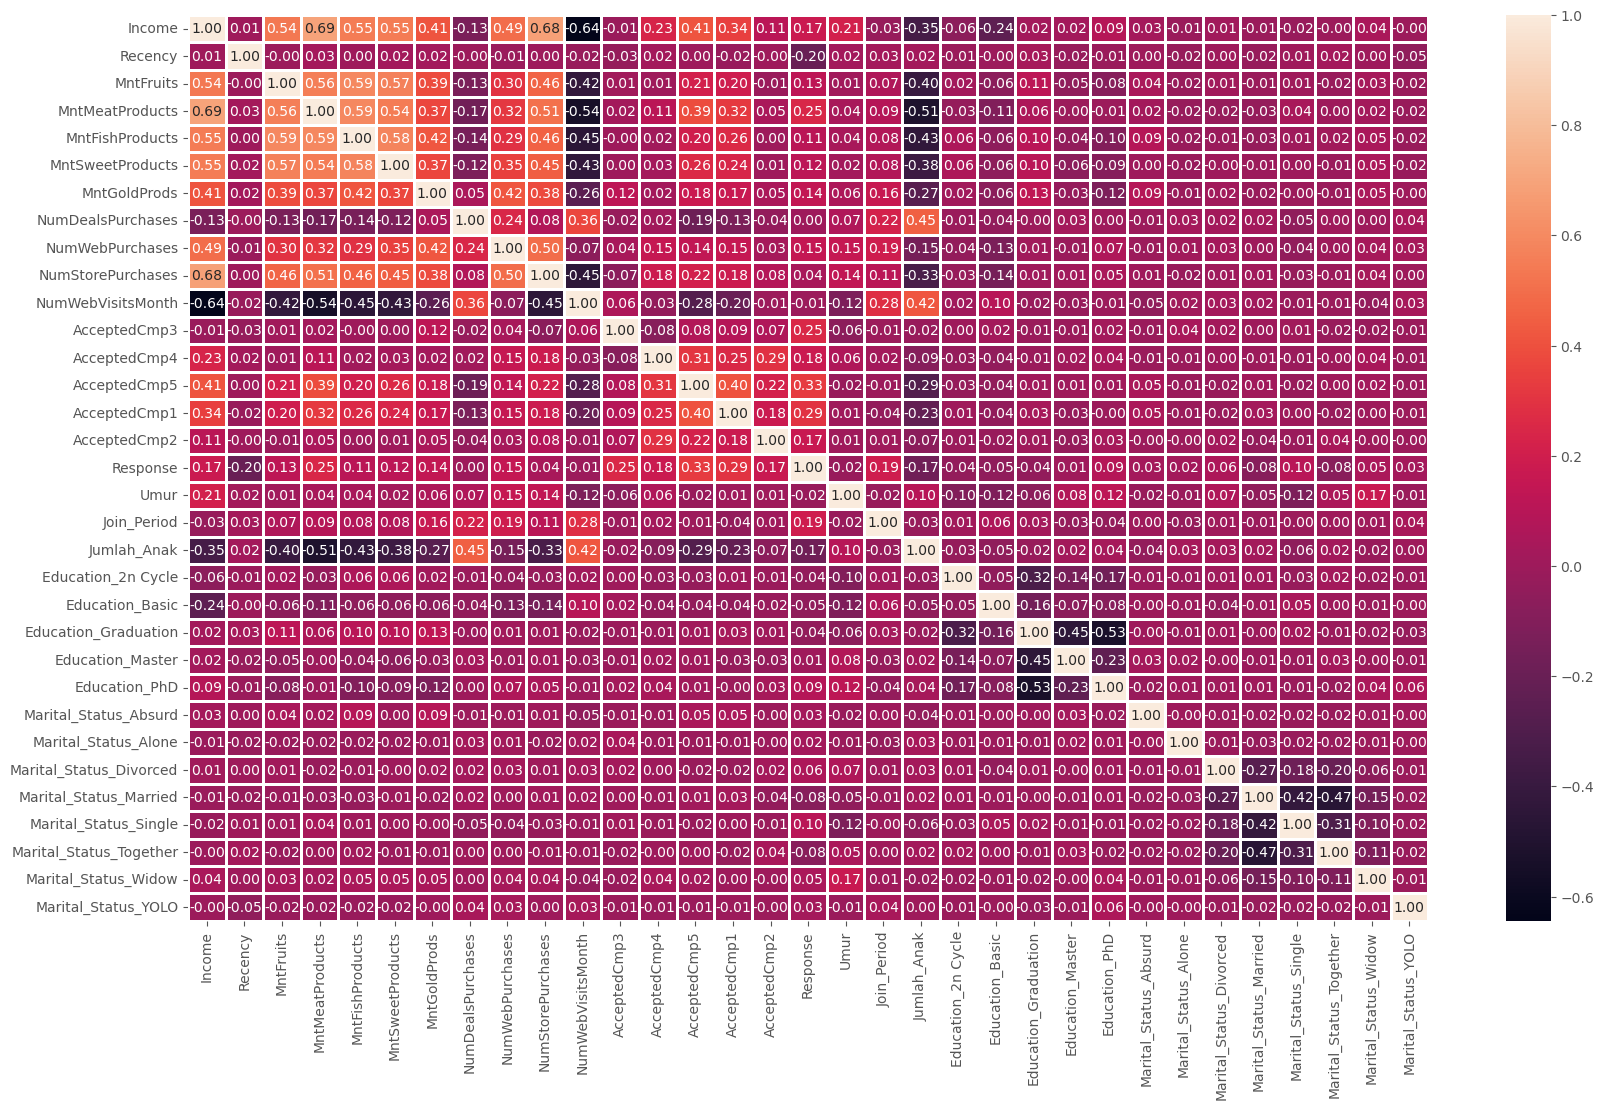

In [1587]:
correlation = df_2.corr()

plt.figure(figsize=(20,12), dpi=100)
sns.heatmap(correlation, annot=True, linewidth=2, fmt='.2f')

In [1588]:
X_2 = df_2.drop('Response', axis=1)
y_2 = df_2['Response']

### Proses Modelling

In [1621]:
## Splitting data menjadi train and test

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)

In [1622]:
## Oversampling pada data train

np.random.seed(42)
X_train, y_train = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [1623]:
## Standarisasi data mengunakan StandardScaler() setelah melakukan splitting to train and test dataset

np.random.seed(42)

scaler = StandardScaler()

## X_train dilakukan fit dan transform
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns)

## X_test cukup dilakukan transform tanpa fitting
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns)

In [1624]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [1625]:
np.random.seed(42)
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

Learning rate set to 0.015619
0:	learn: 0.6832026	total: 3.97ms	remaining: 3.97s
1:	learn: 0.6739796	total: 7.5ms	remaining: 3.74s
2:	learn: 0.6631618	total: 10.9ms	remaining: 3.63s
3:	learn: 0.6524039	total: 14.1ms	remaining: 3.52s
4:	learn: 0.6461778	total: 17.5ms	remaining: 3.49s
5:	learn: 0.6378219	total: 20.8ms	remaining: 3.44s
6:	learn: 0.6272884	total: 23.9ms	remaining: 3.39s
7:	learn: 0.6197260	total: 27.5ms	remaining: 3.41s
8:	learn: 0.6142236	total: 30.7ms	remaining: 3.38s
9:	learn: 0.6068773	total: 34.2ms	remaining: 3.38s
10:	learn: 0.6001701	total: 37.1ms	remaining: 3.34s
11:	learn: 0.5941580	total: 40.3ms	remaining: 3.32s
12:	learn: 0.5880537	total: 43.5ms	remaining: 3.3s
13:	learn: 0.5827534	total: 46.8ms	remaining: 3.3s
14:	learn: 0.5762623	total: 50.2ms	remaining: 3.3s
15:	learn: 0.5710530	total: 53.3ms	remaining: 3.28s
16:	learn: 0.5647530	total: 56.6ms	remaining: 3.27s
17:	learn: 0.5587478	total: 60ms	remaining: 3.27s
18:	learn: 0.5511931	total: 63.1ms	remaining: 3.25

{'KNN': 0.8191330343796711,
 'Logistic Regression': 0.8923766816143498,
 'Random Forest': 0.8849028400597907,
 'Decision Tree': 0.8071748878923767,
 'Adaboost Class': 0.8714499252615845,
 'CatBoost Class': 0.8878923766816144,
 'XGB Class': 0.8819133034379671}

In [1626]:
np.random.seed(42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8923766816143498

In [1627]:
y_preds = clf.predict(X_test)

In [1628]:
confusion_matrix(y_test, y_preds)

array([[538,  32],
       [ 40,  59]], dtype=int64)

In [1629]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       570
           1       0.65      0.60      0.62        99

    accuracy                           0.89       669
   macro avg       0.79      0.77      0.78       669
weighted avg       0.89      0.89      0.89       669



In [1630]:
np.random.seed(42)

cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)
cat_clf.score(X_test,y_test)

Learning rate set to 0.015619
0:	learn: 0.6832026	total: 4.71ms	remaining: 4.71s
1:	learn: 0.6739796	total: 10.5ms	remaining: 5.26s
2:	learn: 0.6631618	total: 15.5ms	remaining: 5.16s
3:	learn: 0.6524039	total: 19.9ms	remaining: 4.96s
4:	learn: 0.6461778	total: 24ms	remaining: 4.78s
5:	learn: 0.6378219	total: 28.8ms	remaining: 4.78s
6:	learn: 0.6272884	total: 33.1ms	remaining: 4.7s
7:	learn: 0.6197260	total: 37.3ms	remaining: 4.63s
8:	learn: 0.6142236	total: 41.3ms	remaining: 4.55s
9:	learn: 0.6068773	total: 45.4ms	remaining: 4.5s
10:	learn: 0.6001701	total: 49.3ms	remaining: 4.43s
11:	learn: 0.5941580	total: 53.7ms	remaining: 4.42s
12:	learn: 0.5880537	total: 57.6ms	remaining: 4.38s
13:	learn: 0.5827534	total: 61.5ms	remaining: 4.33s
14:	learn: 0.5762623	total: 66ms	remaining: 4.34s
15:	learn: 0.5710530	total: 69.9ms	remaining: 4.3s
16:	learn: 0.5647530	total: 74.5ms	remaining: 4.31s
17:	learn: 0.5587478	total: 78.7ms	remaining: 4.29s
18:	learn: 0.5511931	total: 82.5ms	remaining: 4.26s

0.8878923766816144

In [1631]:
y_preds = cat_clf.predict(X_test)

In [1632]:
confusion_matrix(y_test, y_preds)

array([[542,  28],
       [ 47,  52]], dtype=int64)

In [1633]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       570
           1       0.65      0.53      0.58        99

    accuracy                           0.89       669
   macro avg       0.79      0.74      0.76       669
weighted avg       0.88      0.89      0.88       669



### ROC Curve

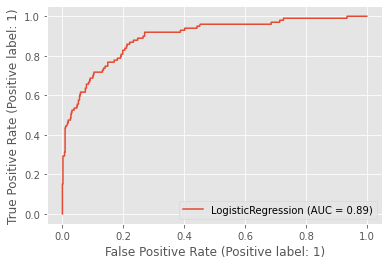

In [1555]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test, y_test);

### Cross Validation

In [1560]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf,
                         X_train,
                         y_train,
                         cv=20, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
print(cv_train)
print('nilai train rata rata: ', np.mean(cv_train))

[0.72932331 0.77443609 0.71428571 0.83458647 0.93233083 0.94736842
 0.98496241 0.97744361 0.94736842 0.95488722 0.9469697  0.91666667
 0.96212121 0.95454545 0.93181818 0.91666667 0.91666667 0.93181818
 0.93939394 0.95454545]
nilai train rata rata:  0.9084102301207562


In [1561]:
# Cross-validated accuracy score on Test Dataset
cv_test = cross_val_score(clf,
                         X_test,
                         y_test,
                         cv=20, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
print(cv_test)
print('nilai test rata rata : ',np.mean(cv_test))

[0.85294118 0.88235294 0.85294118 0.91176471 0.85294118 0.94117647
 0.94117647 0.88235294 0.85294118 0.90909091 0.90909091 0.87878788
 0.93939394 0.96969697 0.87878788 0.96969697 0.90909091 0.87878788
 0.87878788 0.87878788]
nilai test rata rata :  0.8985294117647058


In [1566]:
validation = cross_validate(clf, X, y, cv=20, return_train_score=True)

validation

{'fit_time': array([0.00598097, 0.00401497, 0.00498962, 0.00396037, 0.00398827,
        0.00398946, 0.00398898, 0.00498629, 0.00897622, 0.00598574,
        0.00498748, 0.00398874, 0.0039885 , 0.00398946, 0.00498629,
        0.00498581, 0.00897694, 0.00497413, 0.0039897 , 0.00535321]),
 'score_time': array([0.        , 0.00099754, 0.        , 0.        , 0.00099778,
        0.        , 0.        , 0.        , 0.        , 0.00099754,
        0.        , 0.00099635, 0.0009973 , 0.00099754, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00099707]),
 'test_score': array([0.83035714, 0.85714286, 0.85714286, 0.83928571, 0.84821429,
        0.875     , 0.82142857, 0.86607143, 0.84821429, 0.83783784,
        0.83783784, 0.85585586, 0.85585586, 0.83783784, 0.85585586,
        0.86486486, 0.86486486, 0.89189189, 0.87387387, 0.83783784]),
 'train_score': array([0.85545583, 0.85356637, 0.85403873, 0.85403873, 0.85403873,
        0.85403873, 0.8559282 , 0.85356637, 0.85498347,

In [1564]:
validation = cross_validate(clf, X_train, y_train, cv=20, return_train_score=True)

validation

{'fit_time': array([0.02892137, 0.01792598, 0.03117514, 0.0186913 , 0.02852464,
        0.02348948, 0.02544928, 0.01538968, 0.02193904, 0.02094269,
        0.01396203, 0.01395893, 0.02892232, 0.01395941, 0.01395965,
        0.01411366, 0.0139637 , 0.01302695, 0.01692414, 0.01396227]),
 'score_time': array([0.00102496, 0.00299311, 0.00199437, 0.00299954, 0.00099635,
        0.0009973 , 0.00299239, 0.00099683, 0.00299239, 0.00199485,
        0.0009973 , 0.00099778, 0.00199533, 0.00099587, 0.00199509,
        0.00199461, 0.00099659, 0.00144863, 0.00199437, 0.00099754]),
 'test_score': array([0.72932331, 0.77443609, 0.71428571, 0.83458647, 0.93233083,
        0.94736842, 0.98496241, 0.97744361, 0.94736842, 0.95488722,
        0.9469697 , 0.91666667, 0.96212121, 0.95454545, 0.93181818,
        0.91666667, 0.91666667, 0.93181818, 0.93939394, 0.95454545]),
 'train_score': array([0.92530791, 0.92411601, 0.92808899, 0.92054033, 0.91775924,
        0.91378625, 0.91378625, 0.91219706, 0.91458085,

## MODELLING FOR CLUSTERING OR SEGMENTATION ANALYSIS

In [1475]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Umur,Kelompok_Usia,Total_Campaign,Total_Purchase,Total_Spending,Join_Period,Jumlah_Anak
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,Baby boomers,0,25,1617,29,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,Baby boomers,0,6,27,11,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,Generasi X,0,21,776,18,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,Generasi Y,0,8,53,12,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,Generasi Y,0,19,422,13,1


### Clustering berdasarkan RFM analysis yaitu faktor Recency, Frequency dan Monetary Value

In [1476]:
df_c = df.copy()

In [1477]:
df_c = df_c[['Recency', 'Join_Period', 'Total_Spending', 'Total_Purchase']]
df_c

,Recency,Join_Period,Total_Spending,Total_Purchase
0,58,29,1617,25
1,38,11,27,6
2,26,18,776,21
3,26,12,53,8
4,94,13,422,19
...,...,...,...,...
2235,46,20,1341,18
2236,56,8,444,22
2237,91,13,1241,19
2238,8,13,843,23


In [1478]:
df_c.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,2229.0,49.106326,28.946476,0.0,24.0,49.0,74.0,99.0
Join_Period,2229.0,19.201884,6.644106,8.0,14.0,19.0,25.0,31.0
Total_Spending,2229.0,605.541050,601.032228,5.0,69.0,397.0,1044.0,2525.0
Total_Purchase,2229.0,14.869000,7.622187,0.0,8.0,15.0,21.0,43.0


### Standarisasi feature sebelum modelling

In [1479]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df_c)

In [1480]:
scaled_X

array([[ 0.30731444,  1.47503885,  1.68324736,  1.32944442],
       [-0.38377099, -1.23473719, -0.96279508, -1.16383787],
       [-0.79842225, -0.1809354 ,  0.28367397,  0.80454288],
       ...,
       [ 1.4476054 , -0.93365096,  1.05751657,  0.54209212],
       [-1.42039914, -0.93365096,  0.39517387,  1.06699365],
       [-0.31466245,  1.32449573, -0.72148932, -0.50771095]])

In [1481]:
from sklearn.cluster import KMeans

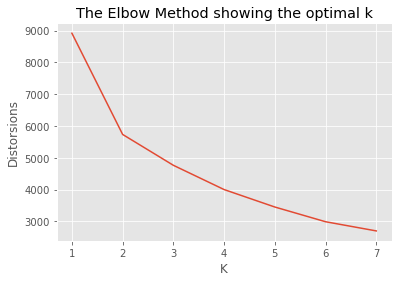

In [1482]:
# # Elbow method to check the best fit K between 2-10
X = scaled_X
distorsions = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=142)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(range(1, 8), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

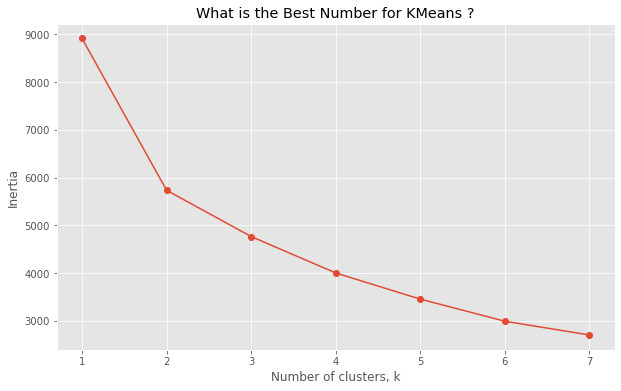

In [1483]:
# # Elbow method to check the best fit K between 2-10

ks = range(1,8)
inertias=[]
           
for k in ks :
    kmeans = KMeans(n_clusters=k,random_state=142)
    kmeans.fit(scaled_X)
    cluster = kmeans.fit_predict(scaled_X)
    inertias.append(kmeans.inertia_)
           
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

### Silhouette Score

In [1484]:
from sklearn.metrics import silhouette_score

In [1485]:
for n_clusters in range(2,8):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(scaled_X)
    preds = clusterer.predict(scaled_X)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(scaled_X, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.21686999492272854
For n_clusters = 3. The average silhouette_score is : 0.1794537502049692
For n_clusters = 4. The average silhouette_score is : 0.20364551452581978
For n_clusters = 5. The average silhouette_score is : 0.19424613359206203
For n_clusters = 6. The average silhouette_score is : 0.2153990490144685
For n_clusters = 7. The average silhouette_score is : 0.21770533613638454
